In [1]:
# Info Bottleneck
# Brett Huffman
# Homework 3 - CSCI 5390
# Feb 8, 2022

# Important libraries I'll be using
import numpy as np
import pandas as pd

# Plot libraries
import matplotlib.pyplot as plt             #visualisation
import seaborn as sns                       #visualisation

%matplotlib inline


In [5]:
# Import the data
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [6]:
# Check it out
train_labels[10]

3

In [12]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results


In [13]:
#Encoding the input data

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
# One Hot Function
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [16]:
# Make Validation Set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [22]:
# Prepare to generate the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input, AlphaDropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score

In [114]:
# Do the actual calculations to see how accurate different layer sizes is

# Create numpy array for accuracy history
npLayer = np.zeros(shape=(0))
npAccuracy = np.zeros(shape=(0))

# Loop [8, 72] Stepping by 8
for i in range(8, 88, 8) :

  # Make New Model
  model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(i, activation="relu"),
    layers.Dense(46, activation="softmax")
  ])

  model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


  history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)
  

  # Pack data into array
  prediction = model.predict(x_val)
  accuracy = accuracy_score(y_val, prediction.round())
  npLayer = np.append(npLayer, i)
  npAccuracy = np.append(npAccuracy, accuracy)



In [115]:
# Check the history
print(npLayer)
print(npAccuracy)

[ 8. 16. 24. 32. 40. 48. 56. 64. 72. 80.]
[0.302 0.594 0.629 0.631 0.627 0.654 0.651 0.646 0.663 0.659]


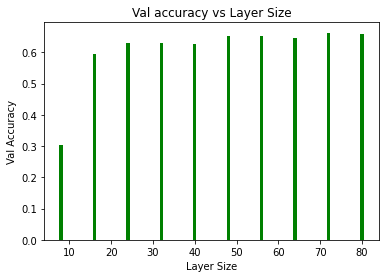

In [116]:

x_pos = [i for i, _ in enumerate(npLayer)]

plt.bar(npLayer, npAccuracy, color='green')
plt.ylabel("Val Accuracy")
plt.xlabel("Layer Size")
plt.title("Val accuracy vs Layer Size")

plt.show()
